In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

#import src.d07_visualization.q4 as q4_vis

In [2]:
df = pd.read_csv('../data/dfPatients_dedup.csv')

In [3]:
# remove the 2 patient outcomes that are null
df.drop(index=df[df['PatientOutcome'].isnull()].index, inplace = True)

In [4]:
# Create dataset with the fields of interest
cols = ['FireStation', 'Shift', 'PatientOutcome','PatientId', 'PatientOutcomeCode']
df_q4 = df[cols].copy(deep=True)

In [5]:
df_q4.drop_duplicates(inplace=True)

In [6]:
df_q4.shape

(246928, 5)

In [7]:
df_q4 = df_q4.astype(dtype={
    'Shift': 'string',
    'PatientOutcome': 'string',
    'PatientId': 'string'
})

df_q4['Shift'] = df_q4['Shift'].apply(lambda x: x.strip())
df_q4['PatientOutcome'] = df_q4['PatientOutcome'].apply(lambda x: x.strip())
df_q4['PatientId'] = df_q4['PatientId'].apply(lambda x: x.strip())

df_q4_c = df_q4.copy(deep='True')

df_q4_c.dtypes

FireStation            int64
Shift                 object
PatientOutcome        object
PatientId             object
PatientOutcomeCode     int64
dtype: object

In [8]:
df_q4_c['PatientOutcome'].value_counts().to_frame()

,PatientOutcome
Treated & Transported,164397
Patient Refusal (AMA),21532
No Treatment/Transport Required,20287
Canceled (Prior to Arrival),17811
"Canceled (On Scene, No Patient Contact)",5524
No Patient Found,4716
Standby (No Services Performed),3989
EMS Assist (Other Agency),3971
Patient Dead at Scene (No EMS CPR),2120
Standby (Operational Support Provided),1358


<AxesSubplot:xlabel='count', ylabel='FireStation'>

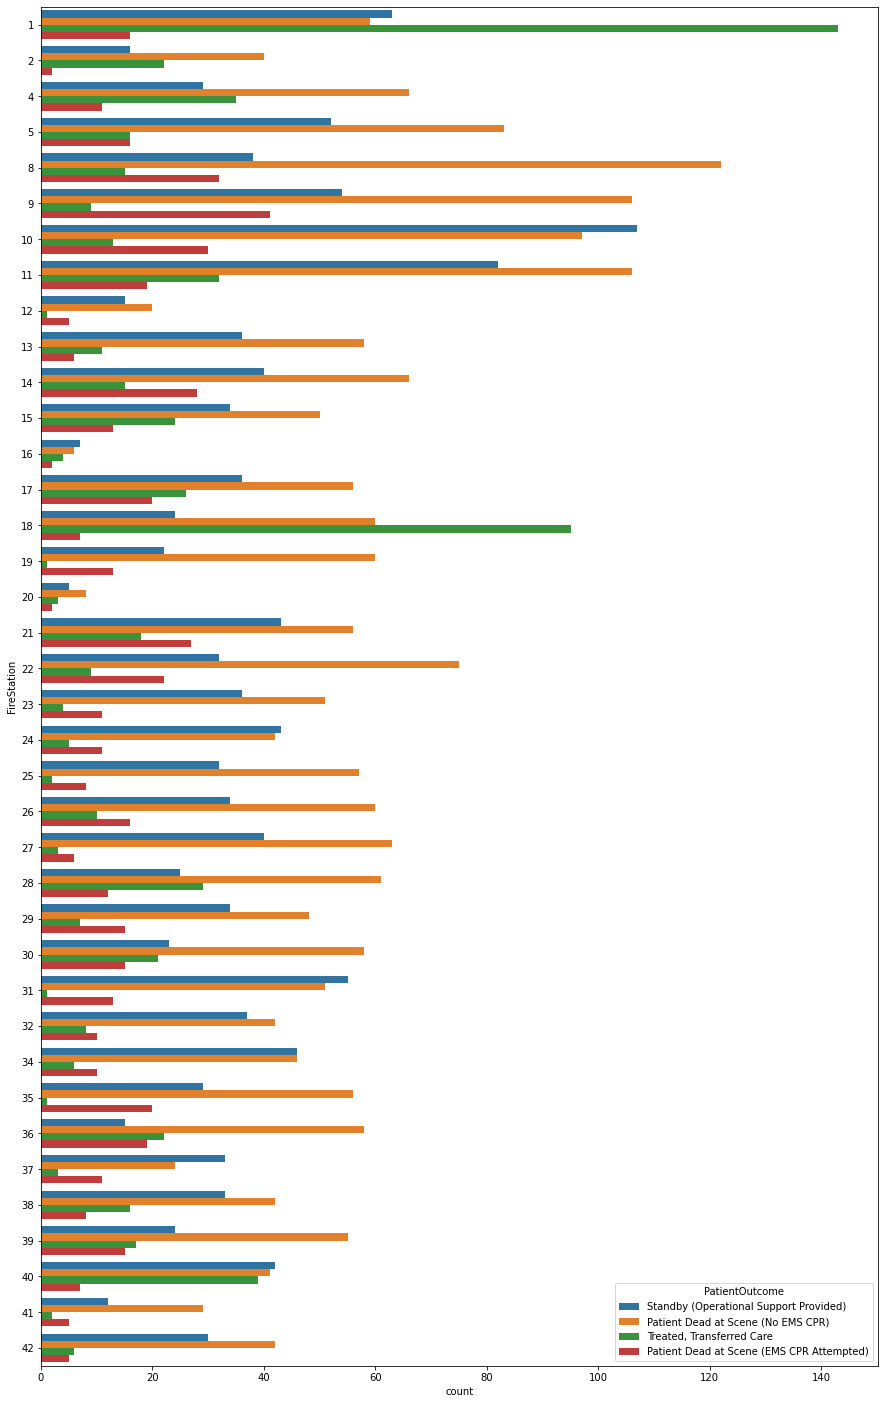

In [9]:
plt.figure(figsize = (15,25))
sns.countplot(y='FireStation',
           data = df_q4_c[df_q4_c['PatientOutcome'].isin(['Patient Dead at Scene (No EMS CPR)','Standby (Operational Support Provided)','Treated, Transferred Care','Patient Dead at Scene (EMS CPR Attempted)'])],
           hue='PatientOutcome')

<AxesSubplot:xlabel='count', ylabel='FireStation'>

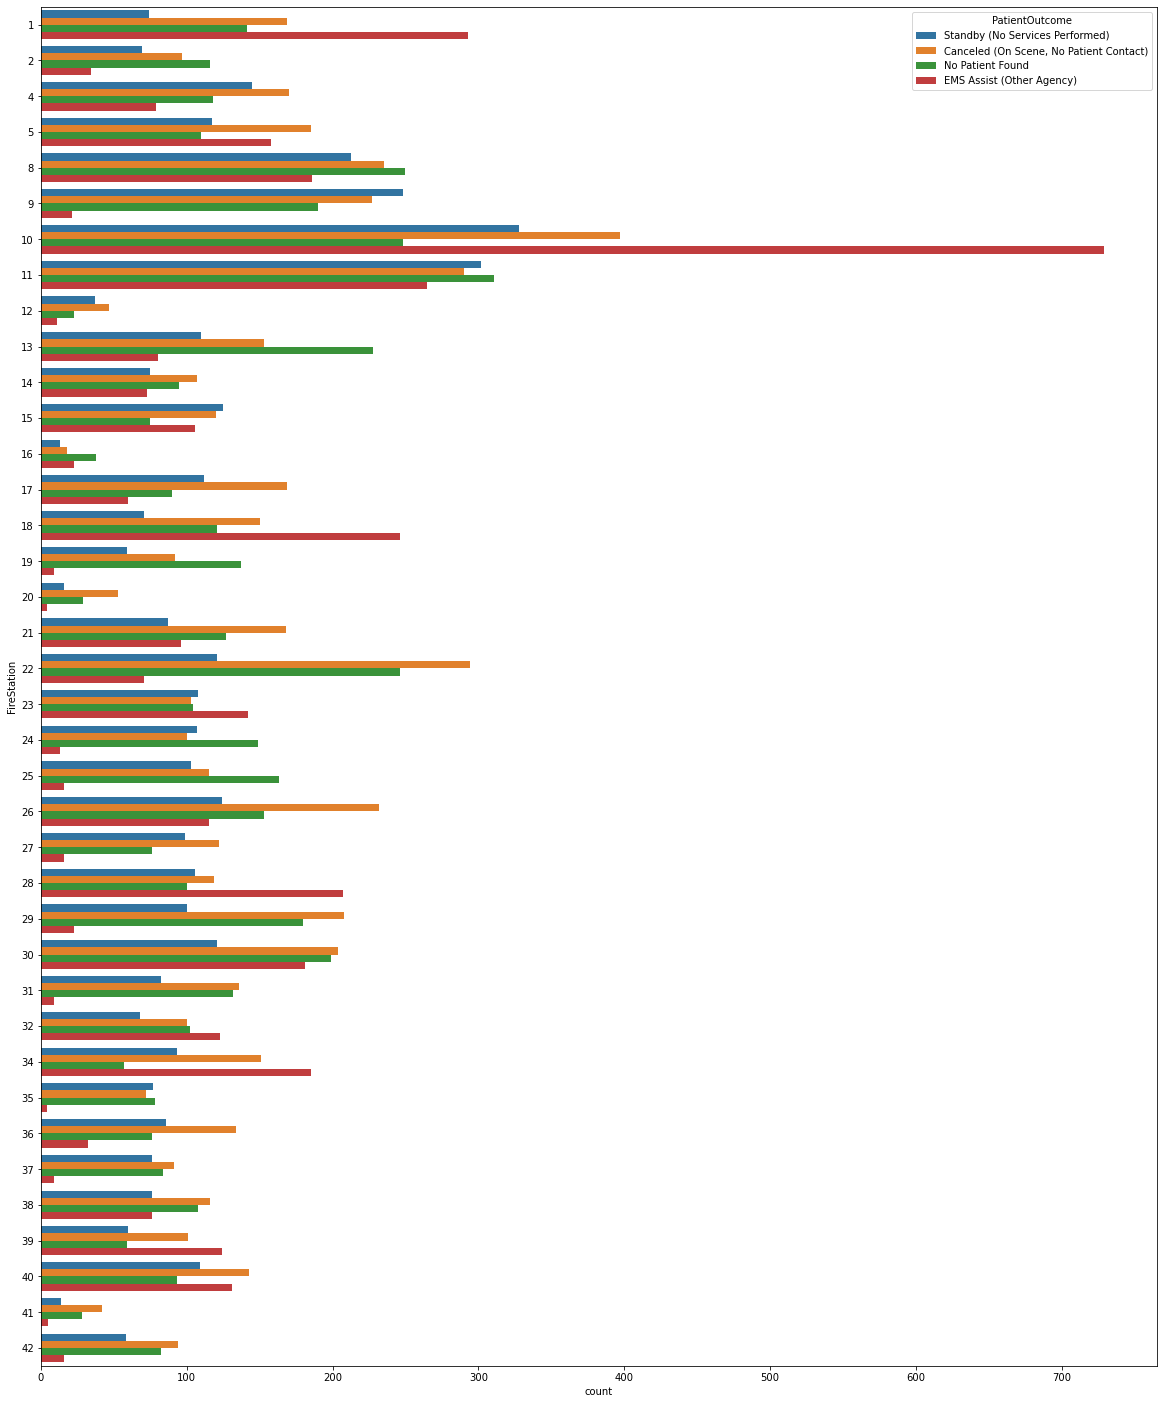

In [10]:
plt.figure(figsize = (20,25))
sns.countplot(y='FireStation',
           data = df_q4_c[df_q4_c['PatientOutcome'].isin(['Canceled (On Scene, No Patient Contact)','No Patient Found','Standby (No Services Performed)','EMS Assist (Other Agency)'])],
           hue='PatientOutcome')

<AxesSubplot:xlabel='count', ylabel='FireStation'>

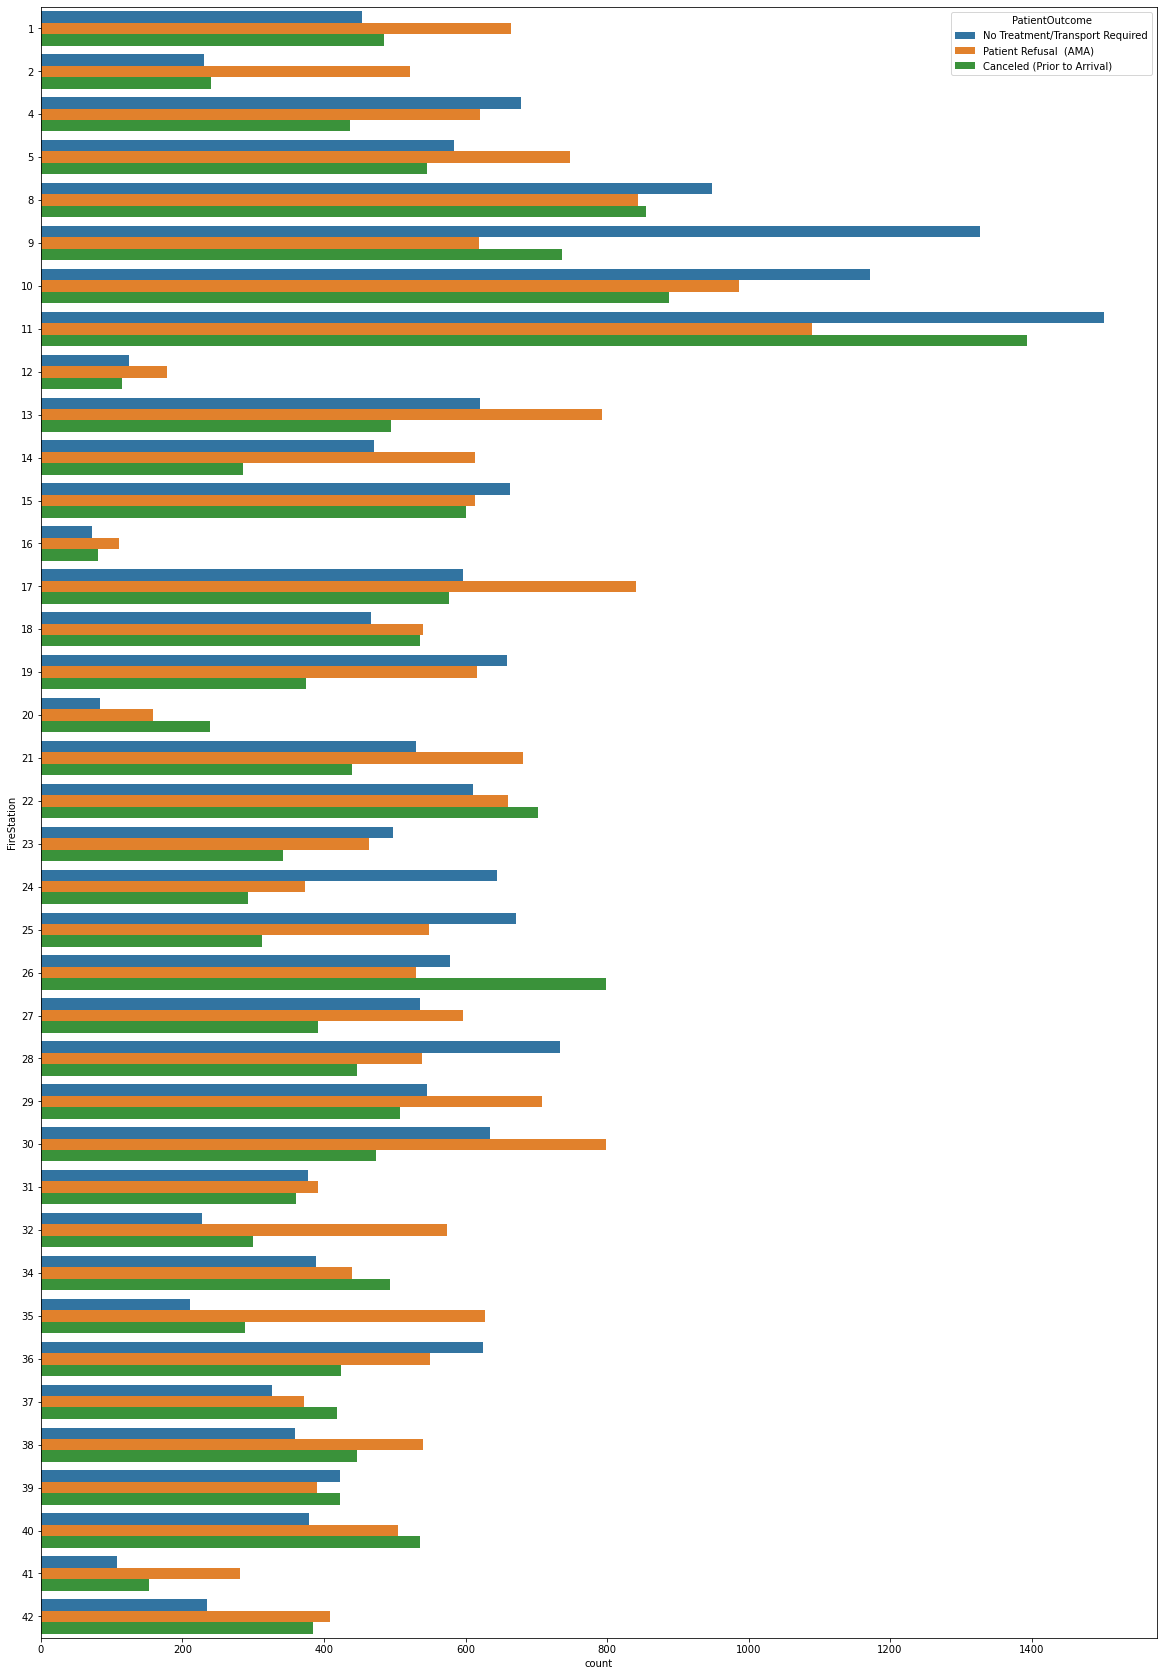

In [11]:
plt.figure(figsize = (20,30))
sns.countplot(y='FireStation',
           data = df_q4_c[df_q4_c['PatientOutcome'].isin(['Patient Refusal  (AMA)','No Treatment/Transport Required','Canceled (Prior to Arrival)'])],
           hue='PatientOutcome')

<AxesSubplot:xlabel='count', ylabel='FireStation'>

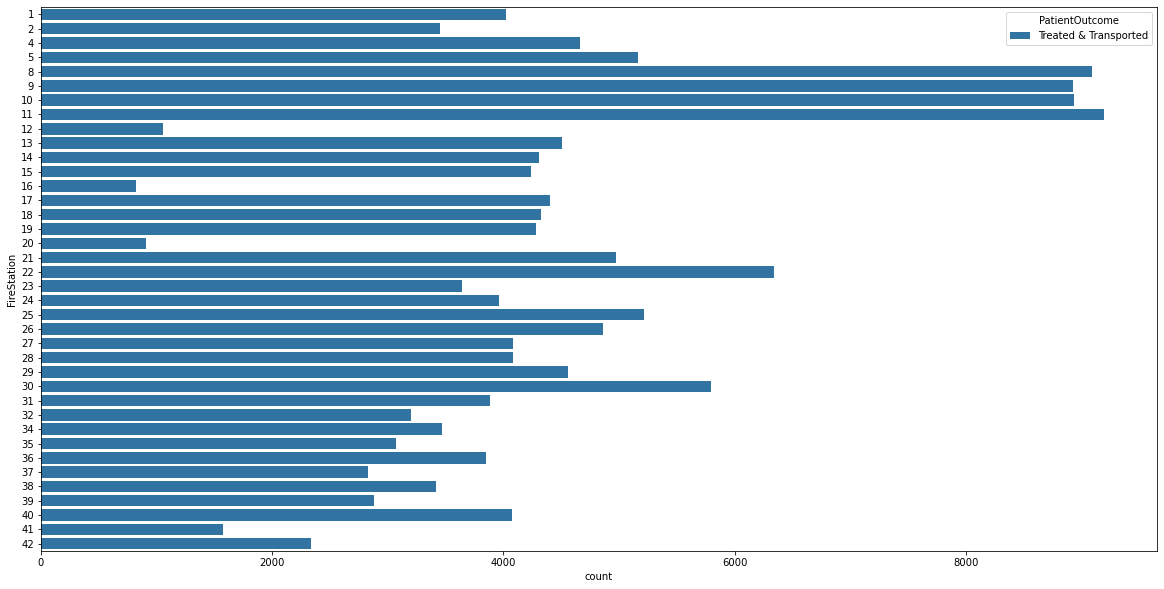

In [12]:
plt.figure(figsize = (20,10))
sns.countplot(y='FireStation',
           data = df_q4_c[df_q4_c['PatientOutcome'].isin(['Treated & Transported'])],
           hue='PatientOutcome')

<AxesSubplot:xlabel='count', ylabel='PatientOutcome'>

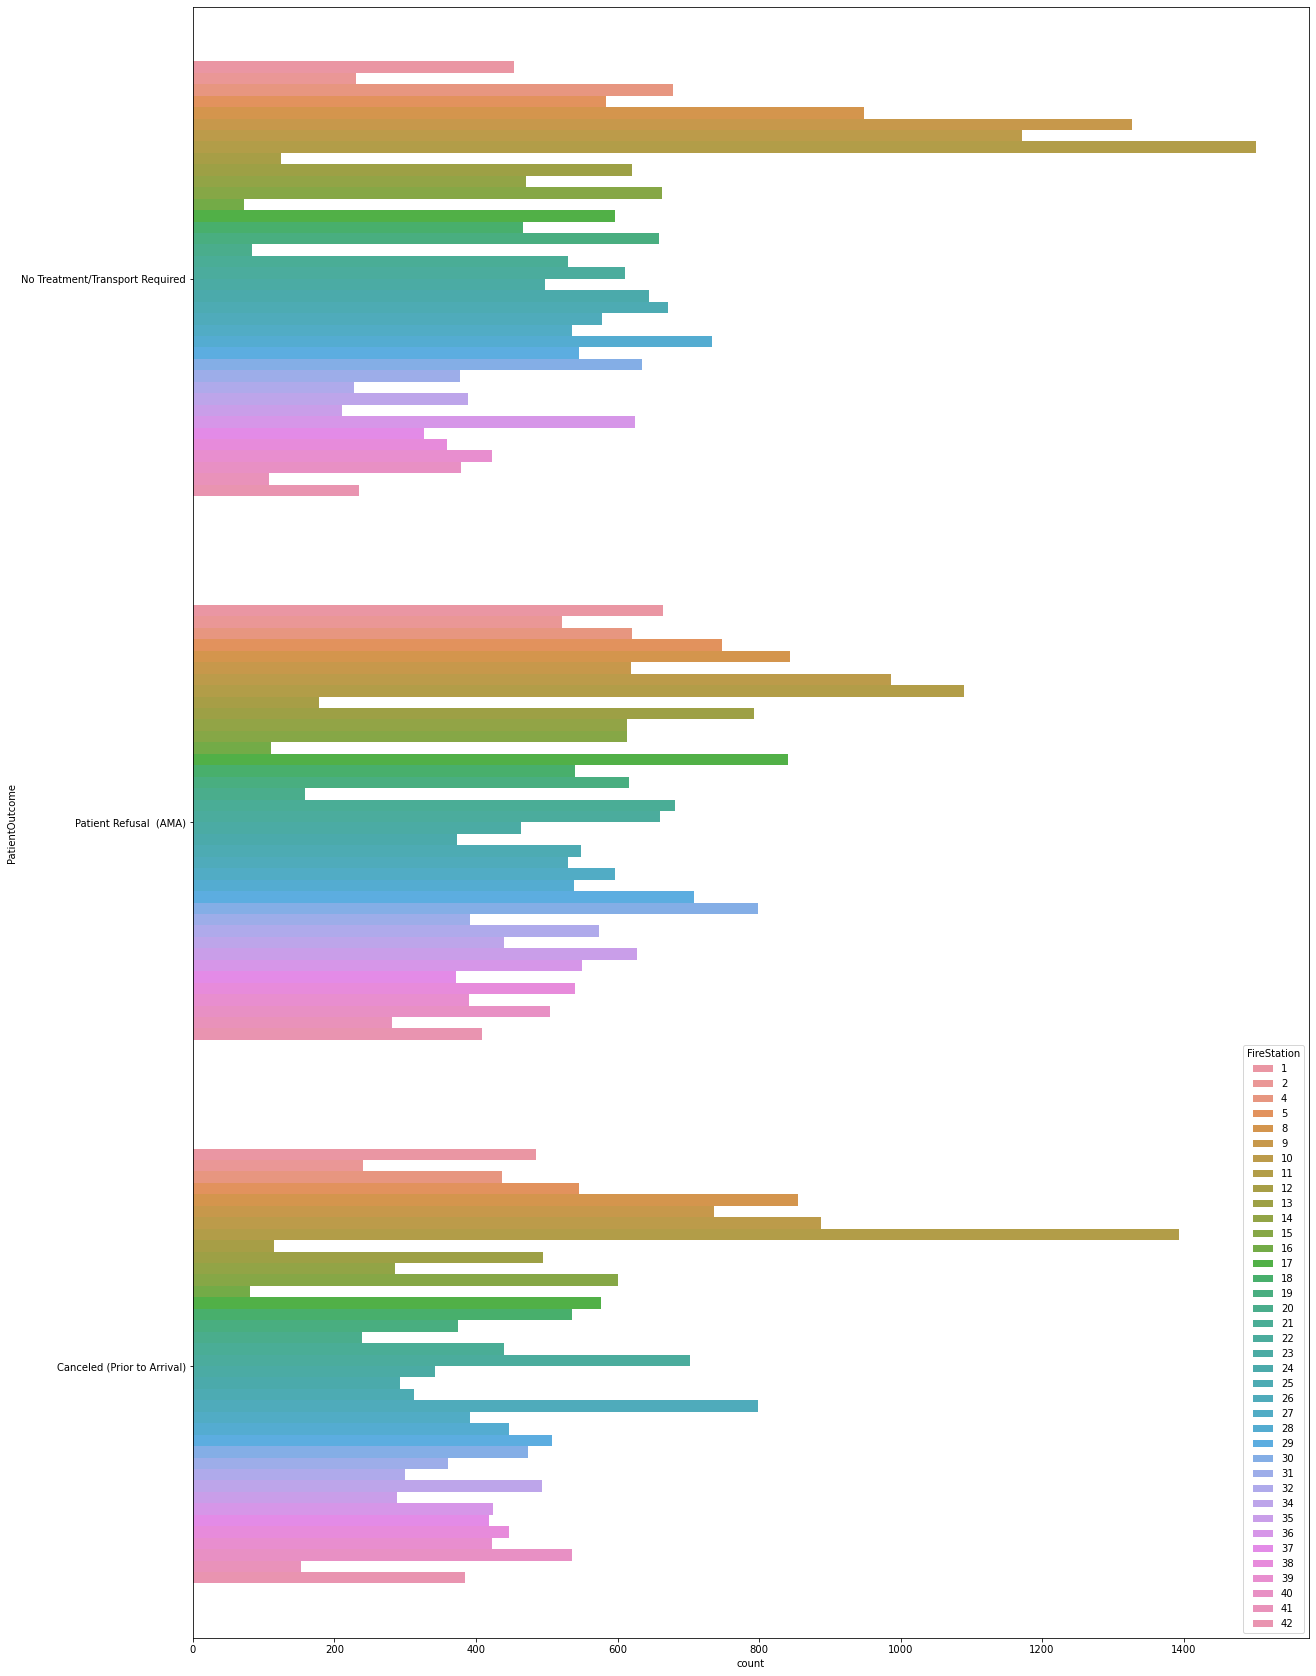

In [13]:
plt.figure(figsize = (20,30))
sns.countplot(y='PatientOutcome',
           data = df_q4_c[df_q4_c['PatientOutcome'].isin(['Patient Refusal  (AMA)','No Treatment/Transport Required','Canceled (Prior to Arrival)'])],
             hue = 'FireStation')

<AxesSubplot:xlabel='FireStation', ylabel='PatientOutcomeCode'>

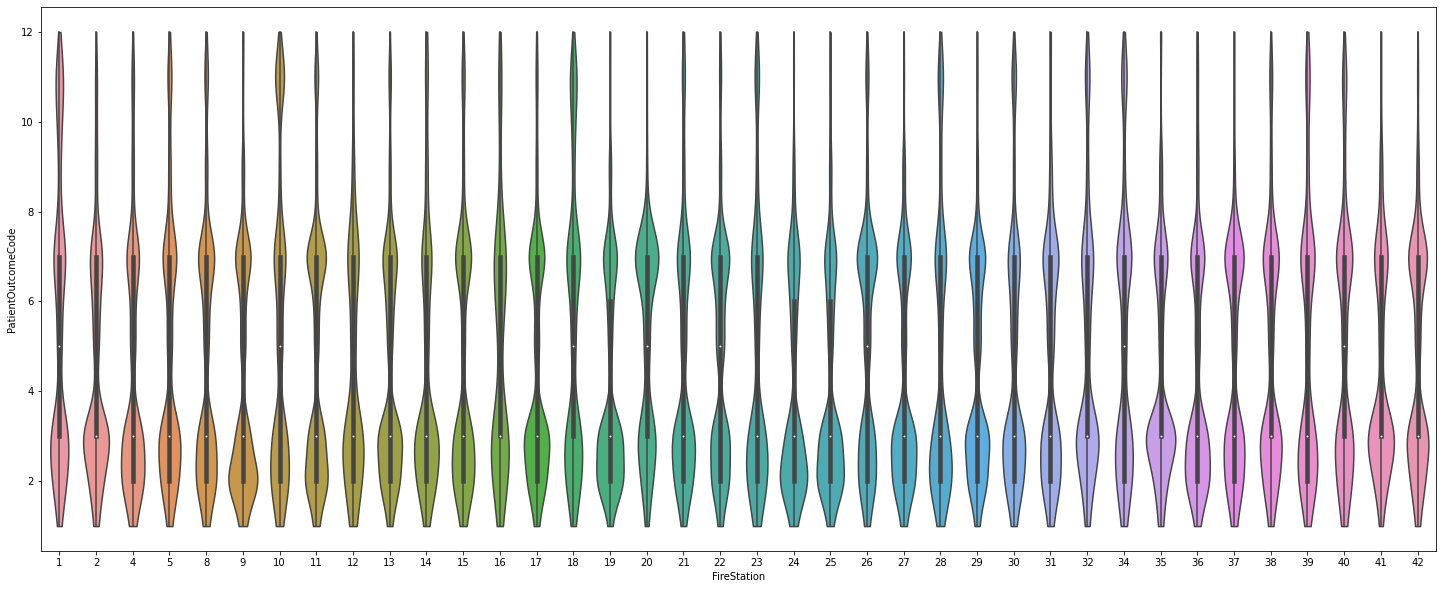

In [14]:
plt.figure(figsize = (25,10))

df_t = df_q4[df_q4['PatientOutcome']!= 'Treated & Transported']
sns.violinplot(y='PatientOutcomeCode',x='FireStation',
               data=df_q4[df_q4['PatientOutcome']!= 'Treated & Transported'],
              scale='area', vw=.9, cut=0)

<ipython-input-15-14bd37d11211>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df_t['PatientOutcome'].cat.categories)


[Text(0, -2.0, 'Canceled (On Scene, No Patient Contact)'),
 Text(0, 0.0, 'Canceled (Prior to Arrival)'),
 Text(0, 2.0, 'EMS Assist (Other Agency)'),
 Text(0, 4.0, 'No Patient Found'),
 Text(0, 6.0, 'No Treatment/Transport Required'),
 Text(0, 8.0, 'Patient Dead at Scene (EMS CPR Attempted)'),
 Text(0, 10.0, 'Patient Dead at Scene (No EMS CPR)'),
 Text(0, 12.0, 'Patient Refusal  (AMA)')]

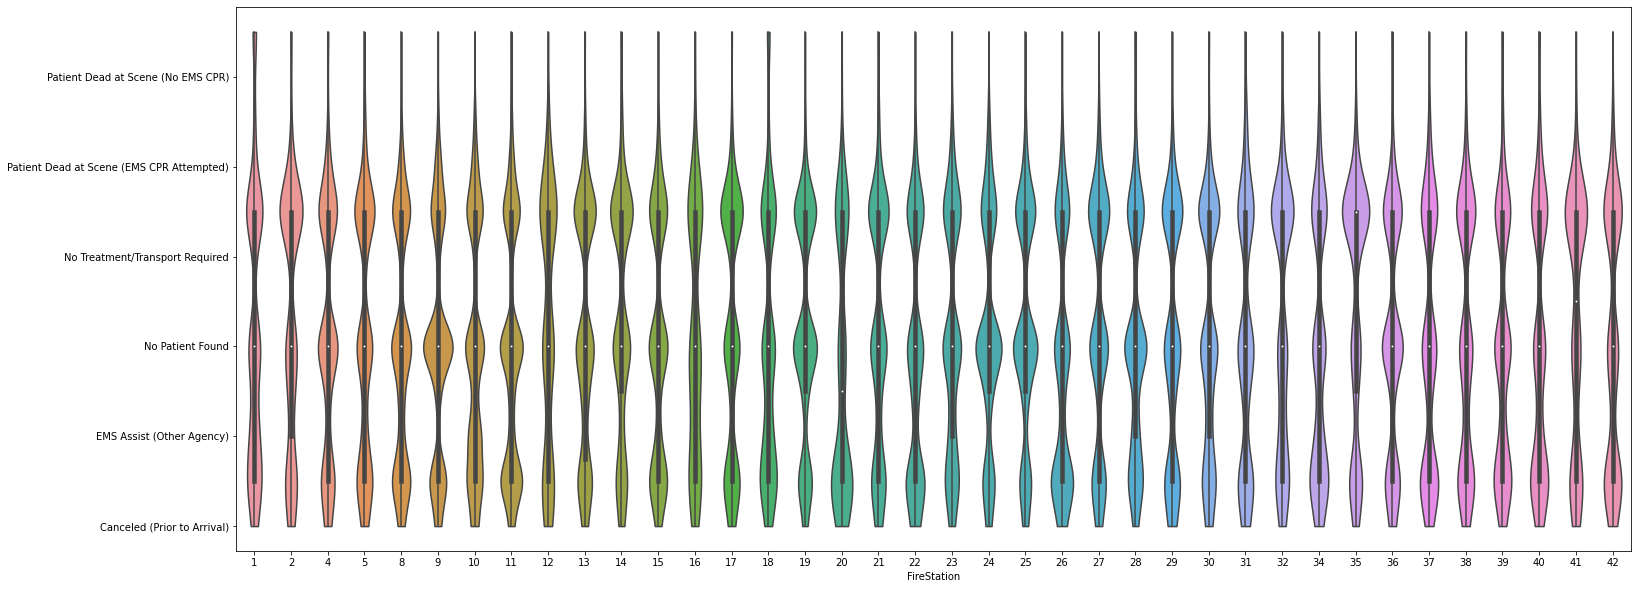

In [15]:
plt.figure(figsize = (25,10))
df_t = df_q4.copy()
df_t['PatientOutcome'] = df_t['PatientOutcome'].astype('category')
ax = sns.violinplot(y=df_t['PatientOutcome'].cat.codes,x='FireStation',
               data=df_t[df_t['PatientOutcome']!= 'Treated & Transported'],
              scale='area', vw=.9, cut=0)
ax.set_yticklabels(df_t['PatientOutcome'].cat.categories)

<AxesSubplot:xlabel='FireStation', ylabel='PatientOutcomeCode'>

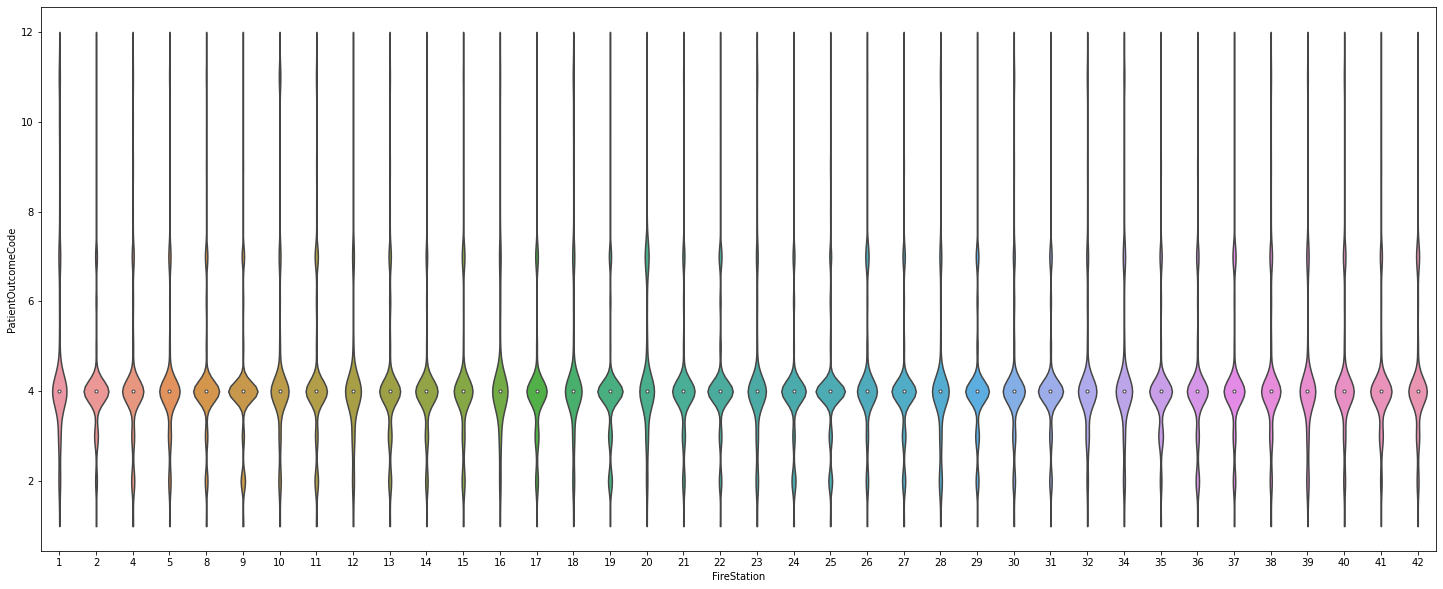

In [16]:
plt.figure(figsize = (25,10))
df_t = df_q4.copy()
df_t['PatientOutcome'] = df_t['PatientOutcome'].astype('category')
sns.violinplot(y='PatientOutcomeCode',x='FireStation',
               data=df_q4,
              scale='area', vw=.9, cut=0)

<ipython-input-17-40fa89780809>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df_t['PatientOutcome'].cat.categories)


[Text(0, -2.0, 'Canceled (On Scene, No Patient Contact)'),
 Text(0, 0.0, 'Canceled (Prior to Arrival)'),
 Text(0, 2.0, 'EMS Assist (Other Agency)'),
 Text(0, 4.0, 'No Patient Found'),
 Text(0, 6.0, 'No Treatment/Transport Required'),
 Text(0, 8.0, 'Patient Dead at Scene (EMS CPR Attempted)'),
 Text(0, 10.0, 'Patient Dead at Scene (No EMS CPR)'),
 Text(0, 12.0, 'Patient Refusal  (AMA)')]

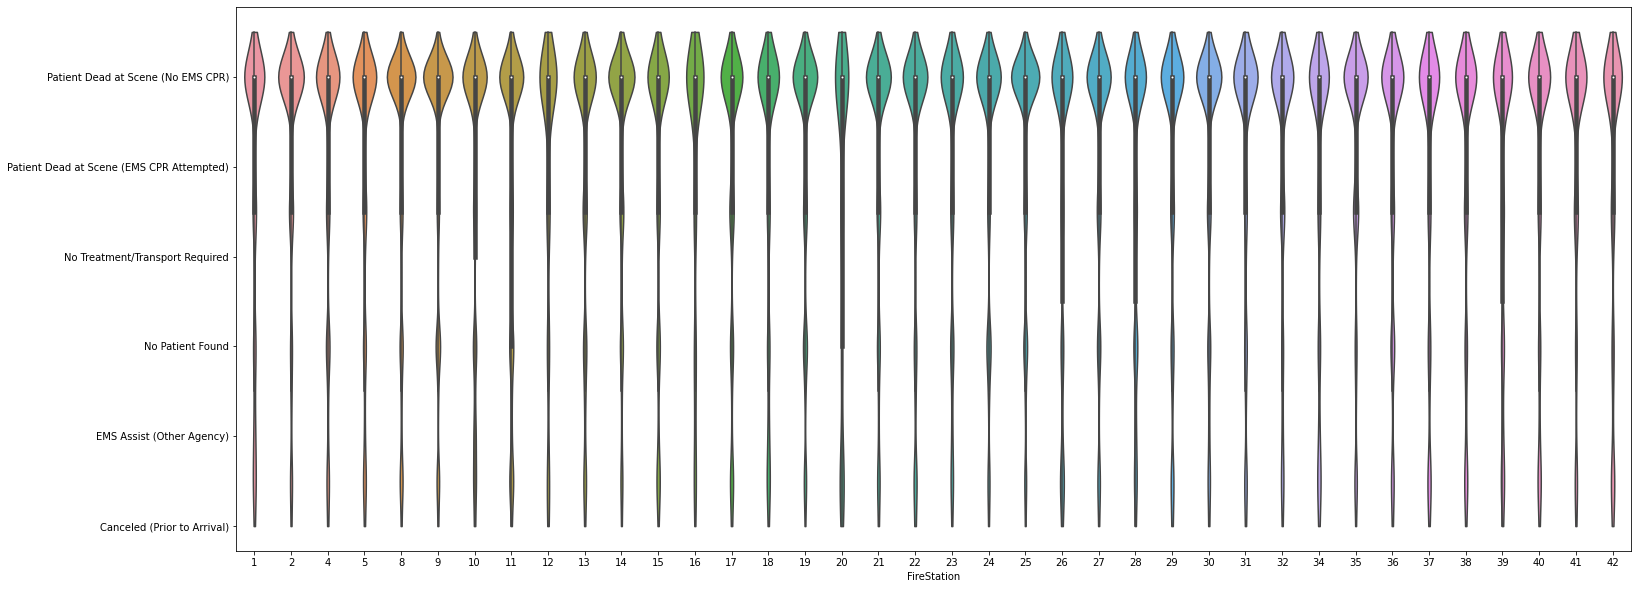

In [17]:
plt.figure(figsize = (25,10))
df_t = df_q4.copy()
df_t['PatientOutcome'] = df_t['PatientOutcome'].astype('category')
ax = sns.violinplot(y=df_t['PatientOutcome'].cat.codes,x='FireStation',
               data=df_t,
              scale='area', vw=.9, cut=0)
ax.set_yticklabels(df_t['PatientOutcome'].cat.categories)

In [18]:
df_q4_c

,FireStation,Shift,PatientOutcome,PatientId,PatientOutcomeCode
0,4,A - Shift,Standby (No Services Performed),479838,1
3,1,A - Shift,No Treatment/Transport Required,479839,2
5,19,B - Shift,Patient Refusal (AMA),479851,3
7,35,A - Shift,Treated & Transported,479853,4
9,37,A - Shift,Treated & Transported,479862,4
...,...,...,...,...,...
543242,1,A - Shift,Canceled (Prior to Arrival),1481528,7
543246,15,C - Shift,"Canceled (On Scene, No Patient Contact)",1481972,5
543249,15,C - Shift,Canceled (Prior to Arrival),1481976,7
543252,18,C - Shift,EMS Assist (Other Agency),1482100,11


In [19]:

fig = px.sunburst(
    data_frame=df_q4_c,
    path=["FireStation", 'PatientOutcome'],  
    color="FireStation",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width = 1500, 
    height = 1400,
    branchvalues="total",
    hover_name="PatientOutcome",
    hover_data={'PatientOutcome': False}
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

In [20]:
fig = px.sunburst(
    data_frame=df_q4_c[df_q4_c['PatientOutcome']!= 'Treated & Transported'],
    path=["FireStation", 'PatientOutcome'],  
    color="FireStation",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width = 1500, 
    height = 1400,
    branchvalues="total",
    hover_name="PatientOutcome",
    hover_data={'PatientOutcome': False}
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

In [21]:
fig = px.sunburst(
    data_frame=df_q4_c,
    path=["PatientOutcome", 'FireStation'],  
    color="PatientOutcome",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width = 1500, 
    height = 1400,
    branchvalues="total",
    hover_name="PatientOutcome",
    hover_data={'PatientOutcome': False}
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

In [22]:
fig = px.sunburst(
    data_frame=df_q4_c,
    path=["PatientOutcome", 'FireStation'],
    color="PatientOutcome",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width = 1500, 
    height = 1400,
    branchvalues="total",
    hover_name="PatientOutcome",
    hover_data={'PatientOutcome': False}
)

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

In [23]:
import plotly.express as px
fig = px.sunburst(
    data_frame=df_q4_c[df_q4_c['PatientOutcome'] != 'Treated & Transported'],
    path=["PatientOutcome", 'FireStation'],  
    color="PatientOutcome",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width = 1500, 
    height = 1400,
    branchvalues="total",
    hover_name="PatientOutcome",
    hover_data={'PatientOutcome': False}
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

In [24]:
import plotly.express as px
fig = px.sunburst(
    data_frame=df_q4_c[df_q4_c['PatientOutcome'] != 'Treated & Transported'],
    path=["PatientOutcome", 'FireStation'],  
    color="PatientOutcome",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width = 1500, 
    height = 1400,
    branchvalues="total",
    hover_name="PatientOutcome",
    hover_data={'PatientOutcome': False}
)

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()